<a href="https://colab.research.google.com/github/bengi123/IntroToAIProject/blob/main/IntroToAIProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# imports
import requests
from bs4 import BeautifulSoup
import os
import re
import urllib
import json
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity


In [98]:
# get user input

def print_one_letter_at_a_time(message):
    for letter in message:
        print(letter, end='', flush=True)
        time.sleep(0.05)  # Adjust the sleep duration to control the speed

# Welcome message
welcome_message = "Welcome to The Music Recommender App"
input_message = "Please, input your lyric keyword(s) or a believed song title and then we will handle the rest:"

print_one_letter_at_a_time(welcome_message)
print("\n")

print_one_letter_at_a_time(input_message)
print("\n")

# Ask for user input
search_term = input()

Welcome to The Music Recommender App

Please, input your lyric keyword(s) or a believed song title and then we will handle the rest:

super


In [90]:
#@title Token
client_access_token = "TeQ7BUxahGZYJxDCUO8i9CYno_Bs0RYCnGK1_nKQB1yzz2gaxdjZLKRcJQLdNdOn"

In [99]:
# Define the search term and API details

#format URI
#search_term = "super"
_URL_API = "https://api.genius.com/"
_URL_SEARCH = "search?q="
#client_access_token = "TeQ7BUxahGZYJxDCUO8i9CYno_Bs0RYCnGK1_nKQB1yzz2gaxdjZLKRcJQLdNdOn"

# Initialize a list to store all the hits
all_hits = []

# Make requests for multiple pages
for page_number in range(1, 6):  #With 1 results per page, I go through 5 pages to get 50 results
    querystring = f"{_URL_API}{_URL_SEARCH}{urllib.parse.quote(search_term)}&per_page=10&page={page_number}"
    request = urllib.request.Request(querystring)
    request.add_header("Authorization", "Bearer " + client_access_token)
    request.add_header("User-Agent", "")
    response = urllib.request.urlopen(request, timeout=3) # make request to database
    data = response.read()
    json_obj = json.loads(data) # convert to json

    # Add the hits from this page to the list of all hits
    all_hits.extend(json_obj['response']['hits'])


In [100]:
# print 50 titles
for hit in all_hits:
    print(hit['result']['title'])

# nNEXT STEP: take the titles and find the nearest neighbors ,of sklearn ,of them after converting the titles into numberical forms

​iSpy
Superman
Super Rich Kids
Supermarket Flowers
Super Bass
Supermodel
Super Far
Súper Jon Z (Residente Challenge)
Doomsday
Super Freaky Girl
Rapp Snitch Knishes
Mi Gna
Beef Rap
Supercut
Champagne Supernova
Don’t Wanna Fall in Love
One Beer
Jump Up, Super Star!
It’s You
Superhero (Heroes & Villains)
Superpower
Hoe Cakes
Jopping
Superstition
Super Mario World
That’s That
Super Gremlin
Супермаркет (Supermarket)
ALIEN SUPERSTAR
Deep Fried Frenz
Rhymes Like Dimes
Superstar
Playinwitme
Lifelight - Super Smash Bros. Ultimate Main Theme
Super Freaky Girl (Roman Remix)
Breakfast in America
Super Saiyan
Superheroes
Superstars
The Logical Song
Super Ugly [I Got Myself A Gun]
List of WWE Superstar Nicknames
SUPERPOSITION
Doubt It
Superclassico
Potholderz
Supernova
Ikuyo
Gazzillion Ear
Super General (Freestyle)


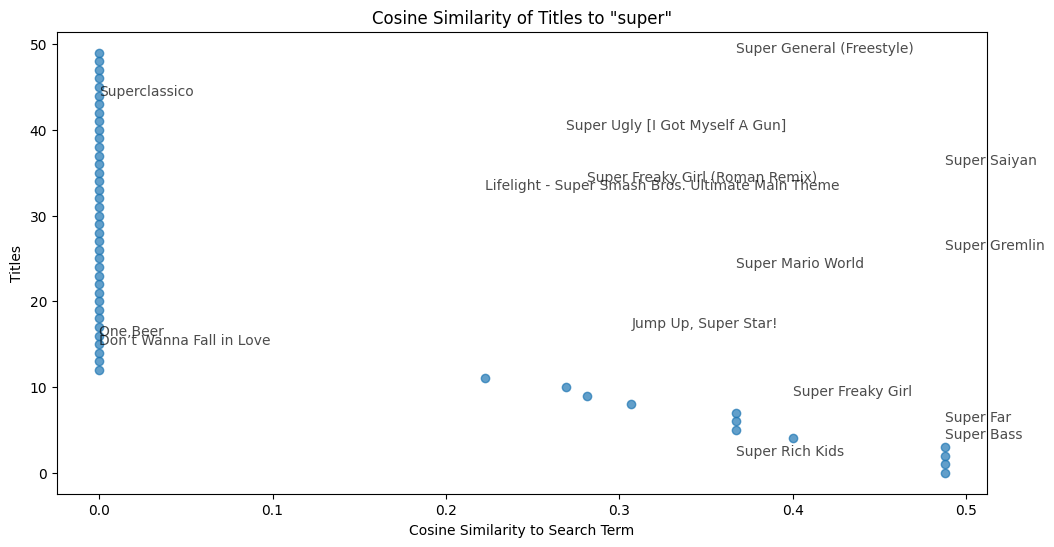

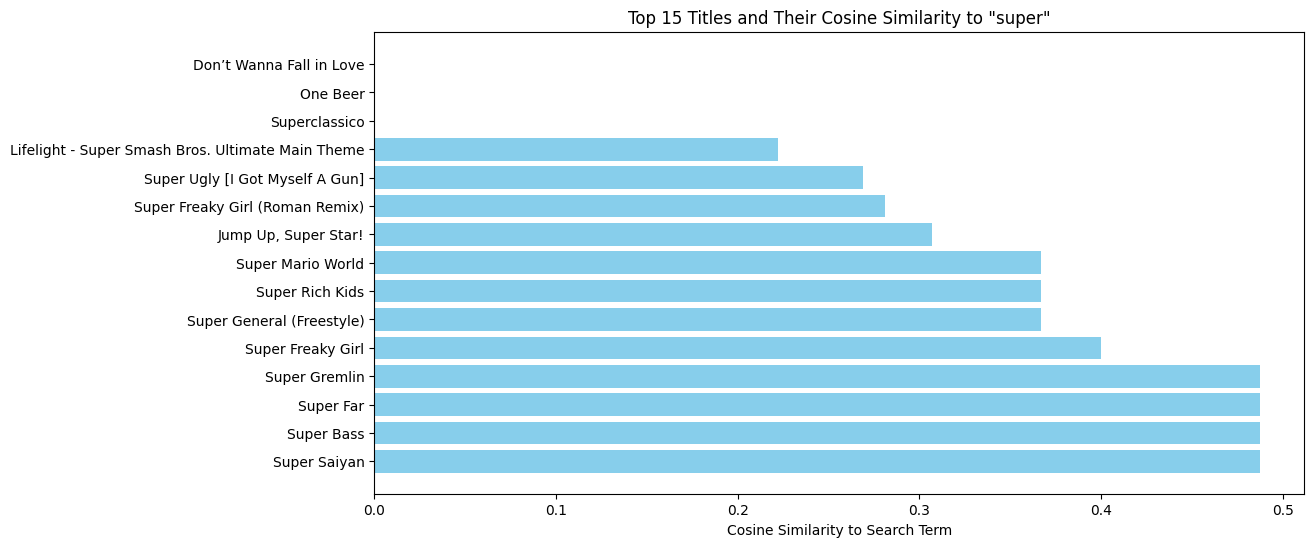

Based on Nearest neighbors, the recommended titles are: Super Bass, Super Saiyan, Super Far, Super Gremlin, Super Freaky Girl
 
Top 5 Recommendations based on cosine similarity:
Super Saiyan by Lil Uzi Vert
Super Bass by Nicki Minaj
Super Far by LANY
Super Gremlin by Kodak Black
Super Freaky Girl by Nicki Minaj


In [111]:
#RECOMMENDATION BASED ON TITLES

# Extract titles and artists from all_hits
titles = [hit['result']['title'] for hit in all_hits]
artists = [hit['result']['primary_artist']['name'] for hit in all_hits]


# Feature Extraction (Use TF-IDF to convert titles into numerical vectors)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(titles)

# Model Selection use Nearest Neighbors
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(tfidf_matrix)

# Use t-SNE to project the data into a 2D space
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Preprocess the search term and titles
search_vector = tfidf_vectorizer.transform([search_term])
titles_vector = tfidf_vectorizer.transform(titles)
cosine_similarities = cosine_similarity(search_vector, tfidf_matrix).flatten()

distances, indices = knn_model.kneighbors(search_vector, n_neighbors=5)
recommended_titles = [titles[i] for i in indices[0]] # recommended titles based on nearest neighbors

# recommendation based on cosine similarity
# Get indices of titles sorted by similarity (closest first)
sorted_indices = np.argsort(cosine_similarities)[::-1]

# Visualize the relationships in a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(cosine_similarities[sorted_indices], np.arange(len(titles)), alpha=0.7)

# Annotate the top 15 closest titles close to the search term
num_titles_to_annotate = 15
for i in range(num_titles_to_annotate):
    title_index = sorted_indices[i]
    plt.annotate(titles[title_index], (cosine_similarities[title_index], title_index), alpha=0.7)

# show shatter plot
plt.xlabel('Cosine Similarity to Search Term')
plt.ylabel('Titles')
plt.title(f'Cosine Similarity of Titles to "{search_term}"')
plt.show()

# Select the top 15 titles and their cosine similarity values
top_titles = [titles[i] for i in sorted_indices[:num_titles_to_annotate]]
top_cosine_similarities = cosine_similarities[sorted_indices[:num_titles_to_annotate]]

# Create a bar plot for the top titles and their cosine similarity values
plt.figure(figsize=(12, 6))
plt.barh(top_titles, top_cosine_similarities, color='skyblue')
plt.xlabel('Cosine Similarity to Search Term')
plt.title(f'Top {num_titles_to_annotate} Titles and Their Cosine Similarity to "{search_term}"')
plt.show()

# top 5 titles who have a cosine similarity of greater than 0
selected_titles = [
    {'title': titles[i], 'artist': artists[i]}
    for i in sorted_indices
    if cosine_similarities[i] > 0
][:5]

print(f"Based on Nearest neighbors, the recommended titles are: {', '.join(recommended_titles)}\n ")


# Print the selected titles
print(f'Top {5} Recommendations based on cosine similarity:')
for entry in selected_titles:
    print(f"{entry['title']} by {entry['artist']}")







In [102]:
# Get lyrics from the title urls

def scrape_lyrics(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, 'html.parser')

    # Find the element containing the lyrics
    lyrics_elements = html.find_all('div', class_='Lyrics__Container-sc-1ynbvzw-1 kUgSbL')

    # Check if the lyrics element was found
    if lyrics_elements:
        # Extract the text from all found lyrics elements
        lyrics = ''
        for lyrics_element in lyrics_elements:
            lyrics += '\n'.join([line.strip() for line in lyrics_element.stripped_strings])
            lyrics += '\n\n'  # Add extra newline between sections (you can adjust this as needed)

        # Remove identifiers like chorus, verse, etc.
        lyrics = re.sub(r'\[[^\]]*\]|\*\*.*?\*\*', '', lyrics)

        # Remove empty lines
        lyrics = os.linesep.join([s for s in lyrics.splitlines() if s])

        return lyrics

# Initialize a list to store lyrics for each song
all_lyrics = []

# Loop through the hits, scrape lyrics, and put the lyrics for that hit into an array
for hit in all_hits:
    url = hit['result']['url']
    lyrics = scrape_lyrics(url)
    if lyrics:
        all_lyrics.append(lyrics)
        print(f"Lyrics from {hit['result']['title']} by {hit['result']['primary_artist']['name']} scraped successfully.")



Lyrics from ​iSpy by KYLE scraped successfully.
Lyrics from Superman by Eminem scraped successfully.
Lyrics from Super Rich Kids by Frank Ocean scraped successfully.
Lyrics from Supermarket Flowers by Ed Sheeran scraped successfully.
Lyrics from Super Bass by Nicki Minaj scraped successfully.
Lyrics from Supermodel by SZA scraped successfully.
Lyrics from Super Far by LANY scraped successfully.
Lyrics from Súper Jon Z (Residente Challenge) by Jon Z scraped successfully.
Lyrics from Doomsday by MF DOOM scraped successfully.
Lyrics from Super Freaky Girl by Nicki Minaj scraped successfully.
Lyrics from Rapp Snitch Knishes by MF DOOM scraped successfully.
Lyrics from Mi Gna by Super Sako scraped successfully.
Lyrics from Beef Rap by MF DOOM scraped successfully.
Lyrics from Supercut by Lorde scraped successfully.
Lyrics from Champagne Supernova by Oasis scraped successfully.
Lyrics from Don’t Wanna Fall in Love by KYLE scraped successfully.
Lyrics from One Beer by MF DOOM scraped successf

In [79]:
#RECOMMENDATION BASED ON LYRICS